### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from pyarabic import araby
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Mohamed
[nltk_data]     Elaraby\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohamed
[nltk_data]     Elaraby\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Load data

In [3]:
df = pd.read_excel('data/data.xlsx')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(len(df))
display(df.head(10))

458197


,id,txt,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ
5,1175668034146643968,@Badi9595 @KanaanRema يااخي الإرهابي اذا كان ع...,IQ
6,1175670153884983296,@SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم است...,IQ
7,1175671762580856832,@KanaanRema @Badi9595 خلص والله لعيونكم انا ما...,IQ
8,1175715664398561280,@SalahAlarbawi يمكن سؤال فات الكثير اللي يصور ...,IQ
9,1176019816072777728,@Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا ان...,IQ


### Txt Preprocessing

#### remove emoji

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#### remove punctuations

In [9]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
translator = str.maketrans('', '', punctuations_list)

#### remove user name, url, spaces, english chrs, new line, repeated chrs

In [10]:
txt_cleaned= []
txt_tokens= []
for line in df['txt']:
    new_line = re.sub('@[^\s]+','',str(line))
    new_line = remove_emoji(new_line)
    new_line = re.sub(r'http\S+', '', new_line)
    new_line = new_line.translate(translator)
    new_line = re.sub(' +', ' ',new_line)
    new_line = re.sub(r'\s*[A-Za-z0-9]+\b', '' , new_line)
    new_line = new_line.replace("\n" ," ")
    new_line = re.sub(r'(.)\1+', r'\1', new_line)
    tokens = araby.tokenize(new_line)
    txt_cleaned.append(new_line)
    txt_tokens.append(tokens)

#### remove stop words using NLTK

In [11]:
tokens_stop_nltk = []
for lst in txt_tokens:
    tokens_stop_nltk.append([word for word in lst if not word in stopwords.words('arabic')])

#### remove stop words using external file

In [12]:
my_file = open("data/stop_list_1177.txt", "r",  encoding='utf-8')
st_all = my_file.read()
multi_sw = st_all.split("\n")
my_file.close()

In [13]:
tokens_stop_all = []
for i in txt_tokens:
    tokens_stop_all.append([word for word in i if not word in multi_sw])

### Create dataframe of cleaned data

In [14]:
df.insert(2, 'txt_cleaned', txt_cleaned)
df.insert(3, 'txt_tokens', txt_tokens)
df.insert(4, 'txt_tokens_sw_nltk', tokens_stop_nltk)
df.insert(5, 'txt_tokens_sw_all', tokens_stop_all)

In [15]:
display(df.head(10))

,id,txt,txt_cleaned,txt_tokens,txt_tokens_sw_nltk,txt_tokens_sw_all,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهاية ينتفض يغير,"[لكن, بالنهاية, ينتفض, يغير]","[بالنهاية, ينتفض, يغير]","[بالنهاية, ينتفض, يغير]",IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون ...,"[يعني, هذا, محسوب, على, البشر, حيونه, وحشيه, و...","[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال...","[محسوب, البشر, حيونه, وحشيه, وتطلبون, الغرب, ي...",IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي,"[مبين, من, كلامه, خليجي]","[مبين, كلامه, خليجي]","[مبين, كلامه, خليجي]",IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه,"[يسلملي, مرورك, وروحك, الحلوه]","[يسلملي, مرورك, وروحك, الحلوه]","[يسلملي, مرورك, وروحك, الحلوه]",IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد,"[وين, هل, الغيبه, اخ, محمد]","[وين, الغيبه, اخ, محمد]","[الغيبه, اخ, محمد]",IQ
5,1175668034146643968,@Badi9595 @KanaanRema يااخي الإرهابي اذا كان ع...,ياخي الإرهابي اذا كان عراقي سعودي فلسطيني وين...,"[ياخي, الإرهابي, اذا, كان, عراقي, سعودي, فلسطي...","[ياخي, الإرهابي, اذا, عراقي, سعودي, فلسطيني, و...","[الإرهابي, عراقي, سعودي, فلسطيني, المشكلة, باب...",IQ
6,1175670153884983296,@SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم است...,مطلبي يقدم استقالته وفوگاها اعتذار,"[مطلبي, يقدم, استقالته, وفوگاها, اعتذار]","[مطلبي, يقدم, استقالته, وفوگاها, اعتذار]","[مطلبي, يقدم, استقالته, وفوگاها, اعتذار]",IQ
7,1175671762580856832,@KanaanRema @Badi9595 خلص والله لعيونكم انا ما...,خلص واله لعيونكم انا ماعندي شيء معه بالعكس من...,"[خلص, واله, لعيونكم, انا, ماعندي, شيء, معه, با...","[خلص, واله, لعيونكم, انا, ماعندي, شيء, معه, با...","[خلص, واله, لعيونكم, انا, ماعندي, بالعكس, متاب...",IQ
8,1175715664398561280,@SalahAlarbawi يمكن سؤال فات الكثير اللي يصور ...,يمكن سؤال فات الكثير الي يصور شنو موقفه وكأنه...,"[يمكن, سؤال, فات, الكثير, الي, يصور, شنو, موقف...","[يمكن, سؤال, فات, الكثير, الي, يصور, شنو, موقف...","[سؤال, فات, الكثير, الي, يصور, موقفه, وكأنه, ي...",IQ
9,1176019816072777728,@Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا ان...,اولا اني ردت على رجل جنوبي والي ذكر حجابها ثا...,"[اولا, اني, ردت, على, رجل, جنوبي, والي, ذكر, ح...","[اولا, اني, ردت, رجل, جنوبي, والي, ذكر, حجابها...","[اولا, اني, ردت, رجل, جنوبي, والي, ذكر, حجابها...",IQ


### Check for nulls 

In [16]:
df.isnull().sum()

id                    0
txt                   0
txt_cleaned           0
txt_tokens            0
txt_tokens_sw_nltk    0
txt_tokens_sw_all     0
dialect               0
dtype: int64

### Display the distribution of each class

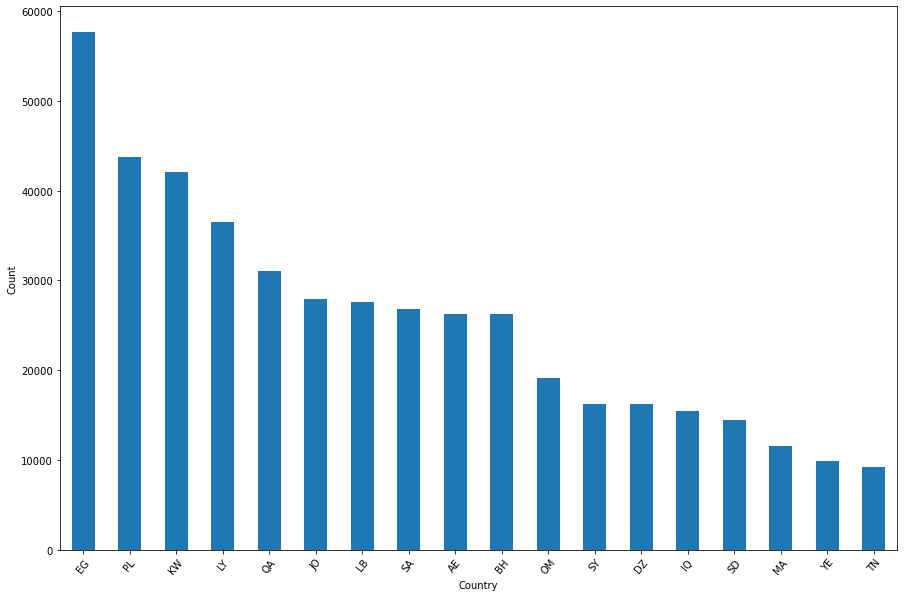

In [17]:
dialect = df.groupby("dialect")
plt.figure(figsize=(15,10))
dialect.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### Save dataframe into Excel

In [18]:
df.to_excel('data/cleaned_data.xlsx')